In [71]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random as rnd

Para a primeira questao vamos criar o modelo de configuraçao modal

In [151]:
def confmod(k):
    N = len(k)
    G = nx.empty_graph(N,nx.MultiGraph())
    lista = []
    for n in G:
        for i in range(k[n]):
            lista.append(n)
    rnd.shuffle(lista)
    while lista:
        a = lista.pop()
        b = lista.pop()
        G.add_edge(a,b)
    return G

segundo, vamos construir uma sequencia de nós que segue uma lei de potencia:

In [235]:
def leidepot(n, k, a):
    nos = []
    s = 0
    km = k * (a /(a + 1))  
    for i in range(n):
        m = 0
        while m == 0: 
            m = int( km*((1 - rnd.random())**(1/(1-a))) )
        s += m
        nos.append(m)     
    if (s % 2) != 0:
        nos[0] += 1
 
    return nos

ex 1:

In [236]:
K1 = leidepot(1000,1,2.5)
K2 = leidepot(1000,2,2.5)
K3 = leidepot(1000,10,2.5)

In [237]:
G1 = confmod(K1)
G2 = confmod(K2)
G3 = confmod(K3)

Para G1:

C:\Users\pedro\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


 Grau max: 170 
 Diametro:  12


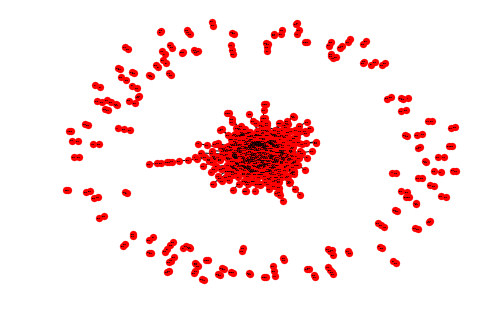

In [238]:
nx.draw(G1, with_labels=True, font_weight='bold', node_size = 50, font_size = 2, linewidths = 0.2, width = 1)
print(" Grau max:",max(dict(G1.degree()).values()),"\n" ,"Diametro: ",
nx.diameter(max(nx.connected_component_subgraphs(G1), key=len)))

parâmetros: α = 2.5 e k medio = 1

com os resultados matematicos esperamos que esta rede tenha grau maximo igual a 100 e diamentro igual a 2

 Grau max: 572 
 Diametro:  10


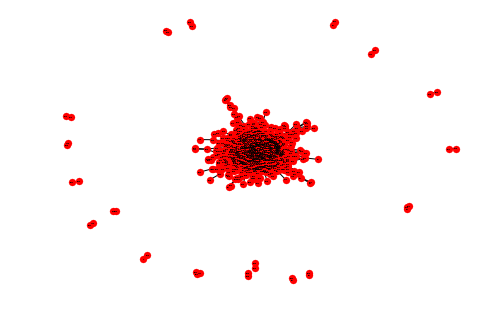

In [162]:
nx.draw(G2, with_labels=True, font_weight='bold', node_size = 50, font_size = 2, linewidths = 0.2, width = 1)
print(" Grau max:",max(dict(G2.degree()).values()),"\n" ,"Diametro: ",
nx.diameter(max(nx.connected_component_subgraphs(G2), key=len)))

parâmetros: α = 2.5 e k medio = 2

com os resultados matematicos esperamos que esta rede tenha grau maximo igual a 100 e diamentro igual a 2

 Grau max: 1122 
 Diametro:  4


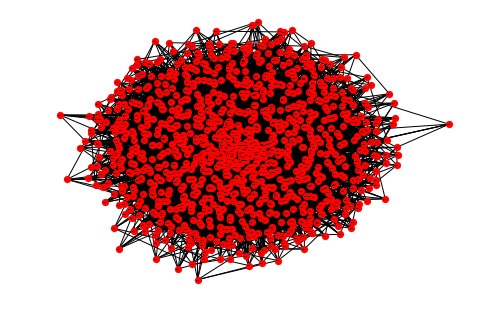

In [163]:
nx.draw(G3, with_labels=True, font_weight='bold', node_size = 50, font_size = 2, linewidths = 0.2, width = 1)
print(" Grau max:",max(dict(G3.degree()).values()),"\n" ,"Diametro: ",
nx.diameter(max(nx.connected_component_subgraphs(G3), key=len)))

parâmetros: α = 2.5 e k medio = 10

com os resultados matematicos esperamos que esta rede tenha grau maximo igual a 600 e diamentro igual a 2

agora iremos criar uma funcao que vai ser responsavel por infectar nós iniciais

In [239]:
def infectados(n,ni):
    if ni > n:
        return "erro"
    p = np.zeros(n, dtype = int)
    i = np.ones(ni, dtype = int)
    escolidos = []
    for k in i:
        z = np.random.randint(n)
        while z in escolidos:
            z = np.random.randint(n)
        escolidos.append(z)
        p[z] = k
    return p

em seguida faremos uma funcão que imuniza (==retira da rede) n nós, teremos 3 funcoes pra isso cada uma preocupada em retirar os nós da rede com um criterio especifico

In [241]:
def aleatorio(G,i):
    A = G.copy()
    l = list(A.nodes)
    k = np.random.choice(l,size = i, replace=False)
    A.remove_nodes_from(k)
    return(A)


In [242]:
def hubs(G,i):
    A = G.copy()
    n = []
    s = list(A.degree())
    s.sort(key = op.itemgetter(1))
    s = [a for a,b in s[-i:]]
    A.remove_nodes_from(s)
        
    return A

In [243]:
def vizinhos(G,i):
    A = G.copy()
    m = set()
    while len(m) < i:
        s = np.random.choice(list(A.nodes()))
        v = list(A.neighbors(s))
        k = np.random.choice(v)
        m.add(k)
    m = list(m)
    A.remove_nodes_from(m)
    
    return A

o motor que espalhara a epidemia sera dado por:

In [244]:
def infecao(G,b,h,i,n = 0,f = None,retorno = "infectados",t = 30):
    if f != None:
        G = nx.Graph(nx.adjacency_matrix(f(G,n)))
    H = G.copy()
    G = np.array(nx.adjacency_matrix(G).todense())
    i = infectados(len(G),i)
    c = []
    for l in range(t):
        for x in range(len(i)):
            if i[x] == 1 and np.random.rand(1) < h:
                i[x] = 0
            for w in H.neighbors(x):
                if i[w] == 1 and np.random.rand(1) < b:
                    i[x] = 1
        c.append(sum(i))
    if retorno == "infectados":
        return c[-1]
    else:
        return plt.scatter(np.linspace(0,100,t),c)  

vamos nos preocupar em simular a imunizacao da rede, para isso criamos as seguintes funcoes: 

teste- ela testara quantos nós precisamos imunizar para cada um dos metodos.

superteste- chamara teste n vezes e dara uma descricão completa

In [255]:
def teste(G):
    tam = len(G)
    inicias = list(map(int,tam*np.array([0.35,0.10,0.005])))
    funcoes = [aleatorio, vizinhos, hubs]
    zippado = zip(funcoes,inicias)
    c = []
    for x,y in zippado:
        t = True
        n = y
        while t == True:
            n += 1
            k = infecao(G,0.01,0.1,5,n,x)
            if k == 0:
                t = False
        c.append(n)
    print(" aletorio :",c[0],"\n","vizinhos :",c[1],"\n","hubs :",c[2],"\n")
        
    return np.array(c)
    

def superteste(G,m):
    z = []
    for x in range(m):
        c = teste(G)
        z.append(c)
    a = pd.DataFrame(data = z,columns = ["aleatorio","vizinhos","hubs"])
    print("aleatorio : \n")
    print("media e variancia :", (a["aleatorio"].mean(),a["aleatorio"].var()),"\n")
    print("vizinhos : \n")
    print("media e variancia :", (a["vizinhos"].mean(),a["vizinhos"].var()),"\n")
    print("hubs : \n")
    print("media e variancia :", (a["hubs"].mean(),a["hubs"].var()),"\n")
    return a

ex 2:

In [247]:
H1 = nx.erdos_renyi_graph(10000,20/(10000-1))

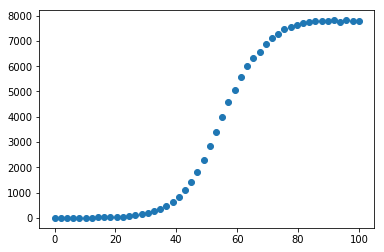

In [184]:
infecao(H1,0.02,0.1,5,retorno = 0, t = 50)

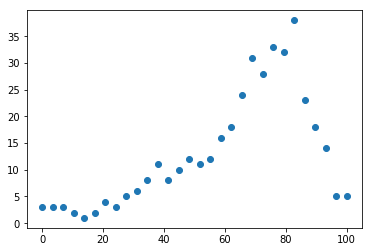

In [185]:
infecao(H1,0.02,0.4,5,retorno = 0)

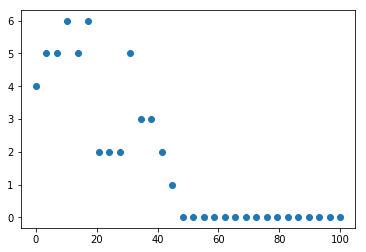

In [186]:
infecao(H1,0.02,0.5,5,retorno = 0)

Construindo agora uma rede seguindo uma lei de potencia e testando infeccoes para diferentes parametros

In [205]:
L1 = leidepot(10000,20,2.5)

In [206]:
H2 = confmod(L1)

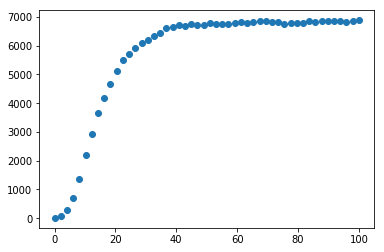

In [207]:
infecao(H2,0.01,0.1,5,retorno = 0, t = 50)

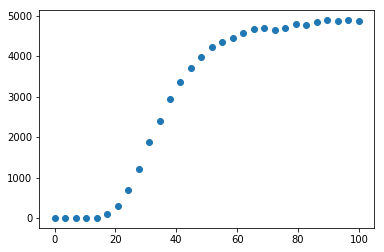

In [208]:
infecao(H2,0.01,0.2,5,  retorno = 1)

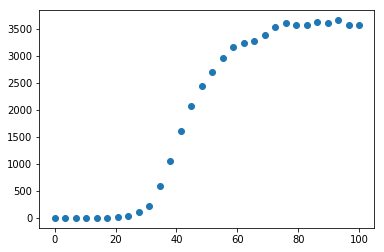

In [209]:
infecao(H2,0.01,0.3,5, retorno = 1)